# Severity Prediction of US car accidents

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.api import OLS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Group2_DS1_Fall2021_Project.csv to Group2_DS1_Fall2021_Project.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Group2_DS1_Fall2021_Project.csv']))

In [ ]:
df.shape

(1048575, 47)

In [ ]:
df.head()

ID  Severity        Start_Time          End_Time  Start_Lat  \
0  A-2716600         3  08-02-2016 00:37  08-02-2016 06:37   40.10891   
1  A-2716601         2  08-02-2016 05:56  08-02-2016 11:56   39.86542   
2  A-2716602         2  08-02-2016 06:15  08-02-2016 12:15   39.10266   
3  A-2716603         2  08-02-2016 06:15  08-02-2016 12:15   39.10148   
4  A-2716604         2  08-02-2016 06:51  08-02-2016 12:51   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [ ]:
#checking for total null values in each attribute
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   688510
Street                        0
Side                          0
City                         69
County                        0
State                         0
Zipcode                     489
Country                       0
Timezone                   1154
Airport_Code               2658
Weather_Timestamp         22115
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity                       0
Bump    

# Data Interpretation, Missing values and Data Cleaning

In [ ]:
# Length of the columns
len(df.columns)

47

In [ ]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   2.164623e+00  3.646292e+01 -9.720202e+01  3.646305e+01 -9.720181e+01   
std    5.460908e-01  5.165882e+00  1.831984e+01  5.165957e+00  1.831963e+01   
min    1.000000e+00  2.457058e+01 -1.244975e+02  2.457433e+01 -1.244975e+02   
25%    2.000000e+00  3.371034e+01 -1.180358e+02  3.371188e+01 -1.180361e+02   
50%    2.000000e+00  3.635720e+01 -9.292586e+01  3.635665e+01 -9.292828e+01   
75%    2.000000e+00  4.023489e+01 -8.038426e+01  4.023471e+01 -8.038469e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)         Number  Temperature(F)  Wind_Chill(F)  \
count  1.048575e+06  360065.000000    1.017832e+06  813974.000000   
mean   5.867531e-01    7869.769653    5.915797e+01      55.283185   
std    1.601684e+00   15619.751306    1.778244e+01      20.048839   
min    0.000000e+00       1.000000   -8.900000e+01     -89.000000   
25%    0.000000e+00    1175.000000    4.700000e+01      42.000000   
50%    1.380000e-01    3771.000000    6.000000e+01      57.000000   
75%    5.910000e-01    9229.000000    7.300000e+01      70.000000   
max    1.551860e+02  961005.000000    1.292000e+02     113.000000   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.015803e+06  1.023115e+06    1.017760e+06    980665.000000   
mean   6.553987e+01  2.951557e+01    9.098803e+00         7.464395   
std    2.298438e+01  9.907375e-01    2.718757e+00         5.810570   
min    2.000000e+00  2.000000e-02    0.000000e+00         0.000000   
25%    4.900000e+01  2.934000e+01    1.000000e+01         3.500000   
50%    6.900000e+01  2.985000e+01    1.000000e+01         7.000000   
75%    8.500000e+01  3.002000e+01    1.000000e+01        10.400000   
max    1.000000e+02  5.804000e+01    1.200000e+02       984.000000   

       Precipitation(in)  
count      789334.000000  
mean            0.007445  
std             0.114932  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            24.000000

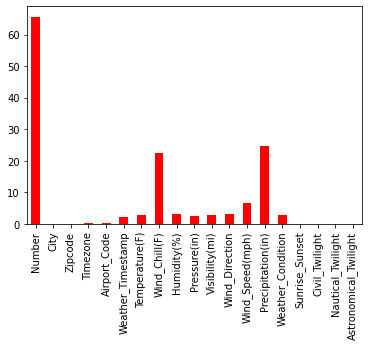

In [ ]:
#bar graph of the missing values in each column
Percentage_of_missing_values = df.isna().sum()/len(df)*100
Percentage_of_missing_values[Percentage_of_missing_values!=0].plot(color = 'red',kind="bar")

# Observation

The above plot shows the percentage of missing values in each feature

In [ ]:
# Number of unique values in each column
print('Unique values per column :',df.nunique())

Unique values per column : ID                       1048575
Severity                       4
Start_Time                420502
End_Time                  425801
Start_Lat                 444890
Start_Lng                 453602
End_Lat                   443064
End_Lng                   451004
Distance(mi)                9983
Description               407542
Number                     31400
Street                     82051
Side                           2
City                        9600
County                      1578
State                         49
Zipcode                   145070
Country                        1
Timezone                       4
Airport_Code                1911
Weather_Timestamp         183423
Temperature(F)               690
Wind_Chill(F)                757
Humidity(%)                   99
Pressure(in)                 959
Visibility(mi)                65
Wind_Direction                24
Wind_Speed(mph)              108
Precipitation(in)            169
Weather_Conditio

In [ ]:
print('Attributes with > 20% missing values: ', df.columns[(100*df.isnull().sum()/df.shape[0]).round(2)>20].tolist())

Attributes with > 20% missing values:  ['Number', 'Wind_Chill(F)', 'Precipitation(in)']


In [ ]:
#dropping the columns which has more than 20% of missing datapoints since we have plenty of data and the missing points in these columns are pretty significant.
df.drop(columns=['Number', 'Wind_Chill(F)', 'Precipitation(in)'], inplace=True)
df.head()


ID  Severity        Start_Time          End_Time  Start_Lat  \
0  A-2716600         3  08-02-2016 00:37  08-02-2016 06:37   40.10891   
1  A-2716601         2  08-02-2016 05:56  08-02-2016 11:56   39.86542   
2  A-2716602         2  08-02-2016 06:15  08-02-2016 12:15   39.10266   
3  A-2716603         2  08-02-2016 06:15  08-02-2016 12:15   39.10148   
4  A-2716604         2  08-02-2016 06:51  08-02-2016 12:51   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ... Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...      False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...      False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...      False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...      False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...      False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 44 columns]

We are Creating a new column as Time_duration. We believe it makes more sense to include this data for predicting the severity in Accidents. 

In [ ]:
#Converting Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
Time_duration='Time_Duration(min)'


#Calculating the amount of time in the unit of minutes for each accident, round to the nearest integer
df[Time_duration]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.head()

ID  Severity          Start_Time            End_Time  Start_Lat  \
0  A-2716600         3 2016-08-02 00:37:00 2016-08-02 06:37:00   40.10891   
1  A-2716601         2 2016-08-02 05:56:00 2016-08-02 11:56:00   39.86542   
2  A-2716602         2 2016-08-02 06:15:00 2016-08-02 12:15:00   39.10266   
3  A-2716603         2 2016-08-02 06:15:00 2016-08-02 12:15:00   39.10148   
4  A-2716604         2 2016-08-02 06:51:00 2016-08-02 12:51:00   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ... Station   Stop  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...   False  False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...   False  False   
2                   At I-71/US-50/Exit 1 - Accident.  ...   False  False   
3                   At I-71/US-50/Exit 1 - Accident.  ...   False  False   
4                    At Dart Ave/Exit 21 - Accident.  ...   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False          False        False          Night          Night   
3           False          False        False          Night          Night   
4           False          False        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight Time_Duration(min)  
0             Night                 Night              360.0  
1             Night                 Night              360.0  
2             Night                   Day              360.0  
3             Night                   Day              360.0  
4               Day                   Day              360.0  

[5 rows x 45 columns]

In [ ]:
df[Time_duration].nunique()

10352

In [ ]:
neg_outliers=df[Time_duration]<=0
df[neg_outliers] = np.nan
df.dropna(subset=[Time_duration],axis=0,inplace=True)
df.head()

ID  Severity          Start_Time            End_Time  Start_Lat  \
0  A-2716600       3.0 2016-08-02 00:37:00 2016-08-02 06:37:00   40.10891   
1  A-2716601       2.0 2016-08-02 05:56:00 2016-08-02 11:56:00   39.86542   
2  A-2716602       2.0 2016-08-02 06:15:00 2016-08-02 12:15:00   39.10266   
3  A-2716603       2.0 2016-08-02 06:15:00 2016-08-02 12:15:00   39.10148   
4  A-2716604       2.0 2016-08-02 06:51:00 2016-08-02 12:51:00   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ... Station   Stop  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...   False  False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...   False  False   
2                   At I-71/US-50/Exit 1 - Accident.  ...   False  False   
3                   At I-71/US-50/Exit 1 - Accident.  ...   False  False   
4                    At Dart Ave/Exit 21 - Accident.  ...   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False          False        False          Night          Night   
3           False          False        False          Night          Night   
4           False          False        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight Time_Duration(min)  
0             Night                 Night              360.0  
1             Night                 Night              360.0  
2             Night                   Day              360.0  
3             Night                   Day              360.0  
4               Day                   Day              360.0  

[5 rows x 45 columns]

In [ ]:
df[Time_duration][df[Time_duration]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Time_Duration(min)'],
      dtype='object')

In [ ]:
df.drop(columns=['Start_Time', 'End_Time','Country','Description','Turning_Loop'], inplace=True)
df.head()

ID  Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  \
0  A-2716600       3.0   40.10891  -83.09286  40.11206 -83.03187   
1  A-2716601       2.0   39.86542  -84.06280  39.86501 -84.04873   
2  A-2716602       2.0   39.10266  -84.52468  39.10209 -84.52396   
3  A-2716603       2.0   39.10148  -84.52341  39.09841 -84.52241   
4  A-2716604       2.0   41.06213  -81.53784  41.06217 -81.53547   

   Distance(mi)       Street Side        City  ... Roundabout Station   Stop  \
0         3.230  Outerbelt E    R      Dublin  ...      False   False  False   
1         0.747       I-70 E    R      Dayton  ...      False   False  False   
2         0.055       I-75 S    R  Cincinnati  ...      False   False  False   
3         0.219      US-50 E    R  Cincinnati  ...      False   False  False   
4         0.123       I-77 N    R       Akron  ...      False   False  False   

  Traffic_Calming Traffic_Signal Sunrise_Sunset  Civil_Twilight  \
0           False          False          Night           Night   
1           False          False          Night           Night   
2           False          False          Night           Night   
3           False          False          Night           Night   
4           False          False          Night           Night   

   Nautical_Twilight  Astronomical_Twilight  Time_Duration(min)  
0              Night                  Night               360.0  
1              Night                  Night               360.0  
2              Night                    Day               360.0  
3              Night                    Day               360.0  
4                Day                    Day               360.0  

[5 rows x 40 columns]

In [ ]:
df.isnull().mean()

ID                       0.000000
Severity                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Street                   0.000000
Side                     0.000000
City                     0.000066
County                   0.000000
State                    0.000000
Zipcode                  0.000452
Timezone                 0.001088
Airport_Code             0.002484
Weather_Timestamp        0.020858
Temperature(F)           0.029109
Humidity(%)              0.031043
Pressure(in)             0.024075
Visibility(mi)           0.029212
Wind_Direction           0.029418
Wind_Speed(mph)          0.065616
Weather_Condition        0.028722
Amenity                  0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway       

In [ ]:
df.shape

(1008247, 40)

In [ ]:
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(930699, 40)

In [ ]:
df.isnull().mean()

ID                       0.0
Severity                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calming          0.0
Traffic_Signal

In [ ]:
#selecting non-numerical value columns
df.select_dtypes(exclude=['int','float']).columns

Index(['ID', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#checking for any duplicate values
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 930699
Number of rows after drop of duplicates: 930699


In [ ]:
# Summarizing the weather conditions, making it simple
unique_weather = df["Weather_Condition"].unique()
print(len(unique_weather))
print(unique_weather)

100
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy'
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Mist' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Freezing Rain / Windy' 'Small Hail' 'Wintry Mix / Windy'
 'L

In [ ]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' nan 'Sand']


In [ ]:
# Summarizing the wind directions, making it simple to denote
df["Wind_Direction"].unique()

array(['SW', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW', 'North',
       'SSE', 'SSW', 'ESE', 'SE', 'East', 'Variable', 'NNE', 'NE', 'ENE',
       'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [ ]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['SW', 'NW', 'W', 'S', 'N', 'SE', 'E', 'Variable', 'NE', 'Calm'],
      dtype=object)

In [ ]:
df.head()

ID  Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  \
0  A-2716600       3.0  40.108910 -83.092860  40.112060 -83.031870   
5  A-2716605       3.0  39.172393 -84.492792  39.170476 -84.501798   
6  A-2716606       2.0  39.063240 -84.032430  39.067310 -84.058510   
7  A-2716607       2.0  39.067080 -84.058550  39.063020 -84.032540   
8  A-2716608       2.0  39.775650 -84.186030  39.772750 -84.188050   

   Distance(mi)           Street Side          City  ... Roundabout Station  \
0         3.230      Outerbelt E    R        Dublin  ...      False   False   
5         0.500           I-75 S    R    Cincinnati  ...      False   False   
6         1.427   State Route 32    R  Williamsburg  ...      False   False   
7         1.423   State Route 32    R       Batavia  ...      False   False   
8         0.227           I-75 S    R        Dayton  ...      False   False   

    Stop Traffic_Calming Traffic_Signal Sunrise_Sunset  Civil_Twilight  \
0  False           False          False          Night           Night   
5  False           False          False            Day             Day   
6  False           False           True            Day             Day   
7  False           False          False            Day             Day   
8  False           False          False            Day             Day   

   Nautical_Twilight  Astronomical_Twilight  Time_Duration(min)  
0              Night                  Night               360.0  
5                Day                    Day               360.0  
6                Day                    Day               360.0  
7                Day                    Day               360.0  
8                Day                    Day               360.0  

[5 rows x 40 columns]

In [ ]:
df.isnull().mean()
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(930398, 40)

In [ ]:
# Number of unique values in each column
print('Unique values per column :',df.nunique())

Unique values per column : ID                       930398
Severity                      4
Start_Lat                405464
Start_Lng                413053
End_Lat                  403927
End_Lng                  410832
Distance(mi)               9524
Street                    76709
Side                          2
City                       9199
County                     1558
State                        49
Zipcode                  133078
Timezone                      4
Airport_Code               1867
Weather_Timestamp        169282
Temperature(F)              676
Humidity(%)                  99
Pressure(in)                941
Visibility(mi)               61
Wind_Direction               10
Wind_Speed(mph)             103
Weather_Condition            10
Amenity                       2
Bump                          2
Crossing                      2
Give_Way                      2
Junction                      2
No_Exit                       2
Railway                       2
Roundabout   

# Observation

From the above we can infer that Wind_Direction initially had 24 unique categorical values but now it has reduced to 10. Same with Weather_Condition it had initially 100 unique categorical values not it has 10.

In [ ]:
#Removing redundant variables towards our model.
df.drop(columns=['Zipcode', 'Street','City','County','Weather_Timestamp','Airport_Code','ID'], inplace=True)
df.head()

Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi) Side  \
0       3.0  40.108910 -83.092860  40.112060 -83.031870         3.230    R   
5       3.0  39.172393 -84.492792  39.170476 -84.501798         0.500    R   
6       2.0  39.063240 -84.032430  39.067310 -84.058510         1.427    R   
7       2.0  39.067080 -84.058550  39.063020 -84.032540         1.423    R   
8       2.0  39.775650 -84.186030  39.772750 -84.188050         0.227    R   

  State    Timezone  Temperature(F)  ...  Roundabout  Station   Stop  \
0    OH  US/Eastern            42.1  ...       False    False  False   
5    OH  US/Eastern            37.0  ...       False    False  False   
6    OH  US/Eastern            35.6  ...       False    False  False   
7    OH  US/Eastern            35.6  ...       False    False  False   
8    OH  US/Eastern            33.8  ...       False    False  False   

  Traffic_Calming  Traffic_Signal Sunrise_Sunset Civil_Twilight  \
0           False           False          Night          Night   
5           False           False            Day            Day   
6           False            True            Day            Day   
7           False           False            Day            Day   
8           False           False            Day            Day   

  Nautical_Twilight Astronomical_Twilight Time_Duration(min)  
0             Night                 Night              360.0  
5               Day                   Day              360.0  
6               Day                   Day              360.0  
7               Day                   Day              360.0  
8               Day                   Day              360.0  

[5 rows x 33 columns]

In [ ]:
# Number of unique values in each column
print('Unique values per column :',df.nunique())

Unique values per column : Severity                      4
Start_Lat                405464
Start_Lng                413053
End_Lat                  403927
End_Lng                  410832
Distance(mi)               9524
Side                          2
State                        49
Timezone                      4
Temperature(F)              676
Humidity(%)                  99
Pressure(in)                941
Visibility(mi)               61
Wind_Direction               10
Wind_Speed(mph)             103
Weather_Condition            10
Amenity                       2
Bump                          2
Crossing                      2
Give_Way                      2
Junction                      2
No_Exit                       2
Railway                       2
Roundabout                    2
Station                       2
Stop                          2
Traffic_Calming               2
Traffic_Signal                2
Sunrise_Sunset                2
Civil_Twilight                2
Nautical_Twil

In [ ]:
df.shape

(930398, 33)

In [ ]:
#selecting numerical value columns
df.select_dtypes(include=['int','float']).columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Time_Duration(min)'],
      dtype='object')

In [ ]:
#selecting non-numerical value columns
df.select_dtypes(exclude=['int','float']).columns

Index(['Side', 'State', 'Timezone', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#Removing the outlier present in the time duration column (3 standard deviations from the mean)
n=3
median = df[Time_duration].median()
std = df[Time_duration].std()
outliers = (df[Time_duration] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[Time_duration].fillna(median, inplace=True)

In [ ]:
df.shape

(930398, 33)

In [ ]:
# Number of unique values in each column
print('Unique values per column :',df.nunique())

Unique values per column : Severity                      4
Start_Lat                390891
Start_Lng                398124
End_Lat                  390140
End_Lng                  396738
Distance(mi)               9265
Side                          2
State                        49
Timezone                      4
Temperature(F)              671
Humidity(%)                  99
Pressure(in)                938
Visibility(mi)               61
Wind_Direction               10
Wind_Speed(mph)             103
Weather_Condition            10
Amenity                       2
Bump                          2
Crossing                      2
Give_Way                      2
Junction                      2
No_Exit                       2
Railway                       2
Roundabout                    2
Station                       2
Stop                          2
Traffic_Calming               2
Traffic_Signal                2
Sunrise_Sunset                2
Civil_Twilight                2
Nautical_Twil

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930398 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               887240 non-null  float64
 1   Start_Lat              887240 non-null  float64
 2   Start_Lng              887240 non-null  float64
 3   End_Lat                887240 non-null  float64
 4   End_Lng                887240 non-null  float64
 5   Distance(mi)           887240 non-null  float64
 6   Side                   887240 non-null  object 
 7   State                  887240 non-null  object 
 8   Timezone               887240 non-null  object 
 9   Temperature(F)         887240 non-null  float64
 10  Humidity(%)            887240 non-null  float64
 11  Pressure(in)           887240 non-null  float64
 12  Visibility(mi)         887240 non-null  float64
 13  Wind_Direction         887240 non-null  object 
 14  Wind_Speed(mph)        887240 non-n

In [ ]:
# Utilize LabelBinarizer to deal with binary data
# Will convert features with binary values to integer values of 0 or 1
# Create a binarizer object for each binary categorical variable
Sunrise_Sunset_bin = LabelBinarizer()
Civil_Twilight_bin = LabelBinarizer()
Nautical_Twilight_bin = LabelBinarizer()
Astronomical_Twilight_bin = LabelBinarizer()
Side_bin = LabelBinarizer()

# Fit and transform each respective binary cat variable to their respective binarizer objects
df.Sunrise_Sunset = Sunrise_Sunset_bin.fit_transform(df.Sunrise_Sunset.astype(str))
df.Civil_Twilight = Civil_Twilight_bin.fit_transform(df.Civil_Twilight.astype(str))
df.Nautical_Twilight = Nautical_Twilight_bin.fit_transform(df.Nautical_Twilight.astype(str))
df.Astronomical_Twilight = Astronomical_Twilight_bin.fit_transform(df.Astronomical_Twilight.astype(str))
df.Side = Side_bin.fit_transform(df.Side.astype(str))



In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Utilize LabelBinarizer to deal with binary data
# Will convert features with binary values to integer values of 0 or 1
# Create a binarizer object for each binary categorical variable
Bump_bin = LabelBinarizer()
Crossing_bin = LabelBinarizer() 
Give_Way_bin = LabelBinarizer()
Junction_bin = LabelBinarizer()
No_Exit_bin = LabelBinarizer()
Railway_bin = LabelBinarizer()
Station_bin = LabelBinarizer()
Traffic_Calming_bin = LabelBinarizer()
Traffic_Signal_bin = LabelBinarizer()
Stop_bin = LabelBinarizer()
Amenity_bin = LabelBinarizer()
Roundabout_bin = LabelBinarizer()

# Fit and transform each respective binary cat variable to their respective binarizer objects
df.Bump = Bump_bin.fit_transform(df.Bump.astype(str))
df.Crossing = Crossing_bin.fit_transform(df.Crossing.astype(str))
df.Give_Way = Give_Way_bin.fit_transform(df.Give_Way.astype(str))
df.Junction = Junction_bin.fit_transform(df.Junction.astype(str))
df.No_Exit = No_Exit_bin.fit_transform(df.No_Exit.astype(str))
df.Railway = Railway_bin.fit_transform(df.Railway.astype(str))
df.Station = Station_bin.fit_transform(df.Station.astype(str))
df.Traffic_Calming = Traffic_Calming_bin.fit_transform(df.Traffic_Calming.astype(str))
df.Traffic_Signal = Traffic_Signal_bin.fit_transform(df.Traffic_Signal.astype(str))
df.Roundabout = Roundabout_bin.fit_transform(df.Roundabout.astype(str))
df.Amenity = Amenity_bin.fit_transform(df.Amenity.astype(str))
df.Stop = Stop_bin.fit_transform(df.Stop.astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930398 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               887240 non-null  float64
 1   Start_Lat              887240 non-null  float64
 2   Start_Lng              887240 non-null  float64
 3   End_Lat                887240 non-null  float64
 4   End_Lng                887240 non-null  float64
 5   Distance(mi)           887240 non-null  float64
 6   Side                   930398 non-null  int32  
 7   State                  887240 non-null  object 
 8   Timezone               887240 non-null  object 
 9   Temperature(F)         887240 non-null  float64
 10  Humidity(%)            887240 non-null  float64
 11  Pressure(in)           887240 non-null  float64
 12  Visibility(mi)         887240 non-null  float64
 13  Wind_Direction         887240 non-null  object 
 14  Wind_Speed(mph)        887240 non-n

In [ ]:
df.select_dtypes(include = 'object').columns


Index(['State', 'Timezone', 'Wind_Direction', 'Weather_Condition'], dtype='object')

In [ ]:
df.isnull().mean()

Severity                 0.046387
Start_Lat                0.046387
Start_Lng                0.046387
End_Lat                  0.046387
End_Lng                  0.046387
Distance(mi)             0.046387
Side                     0.000000
State                    0.046387
Timezone                 0.046387
Temperature(F)           0.046387
Humidity(%)              0.046387
Pressure(in)             0.046387
Visibility(mi)           0.046387
Wind_Direction           0.046387
Wind_Speed(mph)          0.046387
Weather_Condition        0.046387
Amenity                  0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway                  0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Traffic_Signal           0.000000
Sunrise_Sunset           0.000000
Civil_Twilight

In [ ]:
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(887240, 33)

In [ ]:
df.isnull().mean()

Severity                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Side                     0.0
State                    0.0
Timezone                 0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calming          0.0
Traffic_Signal           0.0
Sunrise_Sunset           0.0
Civil_Twilight           0.0
Nautical_Twilight        0.0
Astronomical_Twilight    0.0
Time_Duration(min)       0.0
dtype: float64

In [ ]:
# we can encode the categorical features using the method get_dummies() which converts the features with the one-hot encoding.
categorical_features = set(["State", "Wind_Direction", "Weather_Condition","Timezone"])

for cat in categorical_features:
    df[cat] = df[cat].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887240 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Severity               887240 non-null  float64 
 1   Start_Lat              887240 non-null  float64 
 2   Start_Lng              887240 non-null  float64 
 3   End_Lat                887240 non-null  float64 
 4   End_Lng                887240 non-null  float64 
 5   Distance(mi)           887240 non-null  float64 
 6   Side                   887240 non-null  int32   
 7   State                  887240 non-null  category
 8   Timezone               887240 non-null  category
 9   Temperature(F)         887240 non-null  float64 
 10  Humidity(%)            887240 non-null  float64 
 11  Pressure(in)           887240 non-null  float64 
 12  Visibility(mi)         887240 non-null  float64 
 13  Wind_Direction         887240 non-null  category
 14  Wind_Speed(mph)    

In [ ]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(df[cat].unique()))

Unique classes for each categorical feature:
State           	 49
Weather_Condition 	 10
Timezone        	 4
Wind_Direction  	 10


In [ ]:
#This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter).
onehot_cols = categorical_features

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

df.head()

Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  Side  \
0       3.0  40.108910 -83.092860  40.112060 -83.031870         3.230     0   
5       3.0  39.172393 -84.492792  39.170476 -84.501798         0.500     0   
6       2.0  39.063240 -84.032430  39.067310 -84.058510         1.427     0   
7       2.0  39.067080 -84.058550  39.063020 -84.032540         1.423     0   
8       2.0  39.775650 -84.186030  39.772750 -84.188050         0.227     0   

   Temperature(F)  Humidity(%)  Pressure(in)  ...  Timezone_US/Pacific  \
0            42.1         58.0         29.76  ...                    0   
5            37.0         93.0         29.69  ...                    0   
6            35.6        100.0         29.66  ...                    0   
7            35.6        100.0         29.66  ...                    0   
8            33.8        100.0         29.63  ...                    0   

   Wind_Direction_E  Wind_Direction_N  Wind_Direction_NE  Wind_Direction_NW  \
0                 0                 0                  0                  0   
5                 0                 0                  0                  0   
6                 0                 0                  0                  0   
7                 0                 0                  0                  0   
8                 0                 0                  0                  0   

   Wind_Direction_S  Wind_Direction_SE  Wind_Direction_SW  \
0                 0                  0                  1   
5                 0                  0                  1   
6                 0                  0                  1   
7                 0                  0                  1   
8                 0                  0                  1   

   Wind_Direction_Variable  Wind_Direction_W  
0                        0                 0  
5                        0                 0  
6                        0                 0  
7                        0                 0  
8                        0                 0  

[5 rows x 98 columns]

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df.head()

Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  Side  \
0       3.0  40.108910 -83.092860  40.112060 -83.031870         3.230     0   
5       3.0  39.172393 -84.492792  39.170476 -84.501798         0.500     0   
6       2.0  39.063240 -84.032430  39.067310 -84.058510         1.427     0   
7       2.0  39.067080 -84.058550  39.063020 -84.032540         1.423     0   
8       2.0  39.775650 -84.186030  39.772750 -84.188050         0.227     0   

   Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0            42.1         58.0         29.76            10.0             10.4   
5            37.0         93.0         29.69            10.0             10.4   
6            35.6        100.0         29.66            10.0              8.1   
7            35.6        100.0         29.66            10.0              8.1   
8            33.8        100.0         29.63             3.0              2.3   

   Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  \
0        1     1         1         1         1        1        1           1   
5        1     1         1         1         1        1        1           1   
6        1     1         1         1         1        1        1           1   
7        1     1         1         1         1        1        1           1   
8        1     1         1         1         1        1        1           1   

   Station  Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  \
0        1     1                1               1               0   
5        1     1                1               1               1   
6        1     1                1               0               1   
7        1     1                1               1               1   
8        1     1                1               1               1   

   Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  \
0               0                  0                      0   
5               1                  1                      1   
6               1                  1                      1   
7               1                  1                      1   
8               1                  1                      1   

   Time_Duration(min)  State_AR  State_AZ  State_CA  State_CO  State_CT  \
0               360.0         0         0         0         0         0   
5               360.0         0         0         0         0         0   
6               360.0         0         0         0         0         0   
7               360.0         0         0         0         0         0   
8               360.0         0         0         0         0         0   

   State_DC  State_DE  State_FL  State_GA  State_IA  State_ID  State_IL  \
0         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0         0         0         0         0   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0         0         0         0         0   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0       

In [ ]:
df.isnull().mean()

Severity                          0.0
Start_Lat                         0.0
Start_Lng                         0.0
End_Lat                           0.0
End_Lng                           0.0
Distance(mi)                      0.0
Side                              0.0
Temperature(F)                    0.0
Humidity(%)                       0.0
Pressure(in)                      0.0
Visibility(mi)                    0.0
Wind_Speed(mph)                   0.0
Amenity                           0.0
Bump                              0.0
Crossing                          0.0
Give_Way                          0.0
Junction                          0.0
No_Exit                           0.0
Railway                           0.0
Roundabout                        0.0
Station                           0.0
Stop                              0.0
Traffic_Calming                   0.0
Traffic_Signal                    0.0
Sunrise_Sunset                    0.0
Civil_Twilight                    0.0
Nautical_Twi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887240 entries, 0 to 1048574
Data columns (total 98 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Severity                        887240 non-null  float64
 1   Start_Lat                       887240 non-null  float64
 2   Start_Lng                       887240 non-null  float64
 3   End_Lat                         887240 non-null  float64
 4   End_Lng                         887240 non-null  float64
 5   Distance(mi)                    887240 non-null  float64
 6   Side                            887240 non-null  int32  
 7   Temperature(F)                  887240 non-null  float64
 8   Humidity(%)                     887240 non-null  float64
 9   Pressure(in)                    887240 non-null  float64
 10  Visibility(mi)                  887240 non-null  float64
 11  Wind_Speed(mph)                 887240 non-null  float64
 12  Amenity        

In [ ]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Time_Duration(min)', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       '

In [ ]:
df.shape

(887240, 98)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df.head()

Severity  Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  Side  \
0       2.0  40.738220  -73.848690  40.741350  -73.841990         0.412     0   
1       2.0  37.763453  -77.460447  37.841473  -77.450977         5.415     0   
2       2.0  34.167374 -118.300464  34.164603 -118.296685         0.289     0   
3       2.0  37.901722 -121.467879  37.901722 -121.467879         0.000     0   
4       2.0  33.765910 -117.941955  33.765950 -117.933785         0.469     0   

   Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0            46.9         30.0         30.09            10.0             15.0   
1            73.0         93.0         29.72             1.0             12.0   
2            70.0          9.0         29.33            10.0              0.0   
3            71.0         53.0         29.95            10.0              9.0   
4            52.0         49.0         30.11            10.0              0.0   

   Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  \
0        1     1         1         1         1        1        1           1   
1        1     1         1         1         1        1        1           1   
2        1     1         1         1         1        1        1           1   
3        1     1         1         1         1        1        1           1   
4        1     1         1         1         0        1        1           1   

   Station  Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  \
0        1     0                1               1               1   
1        1     1                1               1               0   
2        1     1                1               1               1   
3        1     1                1               1               1   
4        1     1                1               1               0   

   Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  \
0               1                  1                      1   
1               0                  0                      0   
2               1                  1                      1   
3               1                  1                      1   
4               0                  0                      0   

   Time_Duration(min)  State_AR  State_AZ  State_CA  State_CO  State_CT  \
0               360.0         0         0         0         0         0   
1                99.0         0         0         0         0         0   
2               280.0         0         0         1         0         0   
3                78.0         0         0         1         0         0   
4                78.0         0         0         1         0         0   

   State_DC  State_DE  State_FL  State_GA  State_IA  State_ID  State_IL  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0     

In [ ]:
df.shape

(88724, 98)

# Preliminary Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Correlation Matrix of only Continous numerical values
Z = df[[ 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)','Time_Duration(min)']]
corr = Z.corr()
corr

Start_Lat  Start_Lng   End_Lat   End_Lng  Distance(mi)  \
Start_Lat            1.000000  -0.066011  0.999994 -0.066012      0.042674   
Start_Lng           -0.066011   1.000000 -0.066014  0.999999      0.073363   
End_Lat              0.999994  -0.066014  1.000000 -0.066017      0.042154   
End_Lng             -0.066012   0.999999 -0.066017  1.000000      0.073325   
Distance(mi)         0.042674   0.073363  0.042154  0.073325      1.000000   
Side                -0.026520   0.059795 -0.026519  0.059794     -0.082306   
Temperature(F)      -0.483785   0.003229 -0.483782  0.003230     -0.038982   
Humidity(%)          0.031646   0.181639  0.031652  0.181644      0.032468   
Pressure(in)        -0.189723   0.183405 -0.189724  0.183403     -0.017733   
Visibility(mi)      -0.085271   0.011892 -0.085271  0.011898     -0.008974   
Wind_Speed(mph)      0.035340   0.152611  0.035342  0.152599      0.006709   
Time_Duration(min)  -0.036447   0.048454 -0.036436  0.048447      0.059759   

                        Side  Temperature(F)  Humidity(%)  Pressure(in)  \
Start_Lat          -0.026520       -0.483785     0.031646     -0.189723   
Start_Lng           0.059795        0.003229     0.181639      0.183405   
End_Lat            -0.026519       -0.483782     0.031652     -0.189724   
End_Lng             0.059794        0.003230     0.181644      0.183403   
Distance(mi)       -0.082306       -0.038982     0.032468     -0.017733   
Side                1.000000        0.012915    -0.003475     -0.011585   
Temperature(F)      0.012915        1.000000    -0.388250      0.160073   
Humidity(%)        -0.003475       -0.388250     1.000000      0.128144   
Pressure(in)       -0.011585        0.160073     0.128144      1.000000   
Visibility(mi)      0.015330        0.201805    -0.371121      0.027958   
Wind_Speed(mph)     0.006536        0.115316    -0.183693     -0.026965   
Time_Duration(min)  0.024384        0.066500    -0.014662      0.104860   

                    Visibility(mi)  Wind_Speed(mph)  Time_Duration(min)  
Start_Lat                -0.085271         0.035340           -0.036447  
Start_Lng                 0.011892         0.152611            0.048454  
End_Lat                  -0.085271         0.035342           -0.036436  
End_Lng                   0.011898         0.152599            0.048447  
Distance(mi)             -0.008974         0.006709            0.059759  
Side                      0.015330         0.006536            0.024384  
Temperature(F)            0.201805         0.115316            0.066500  
Humidity(%)              -0.371121        -0.183693           -0.014662  
Pressure(in)              0.027958        -0.026965            0.104860  
Visibility(mi)            1.000000         0.036442            0.026781  
Wind_Speed(mph)           0.036442         1.000000            0.069095  
Time_Duration(min)        0.026781         0.069095            1.000000

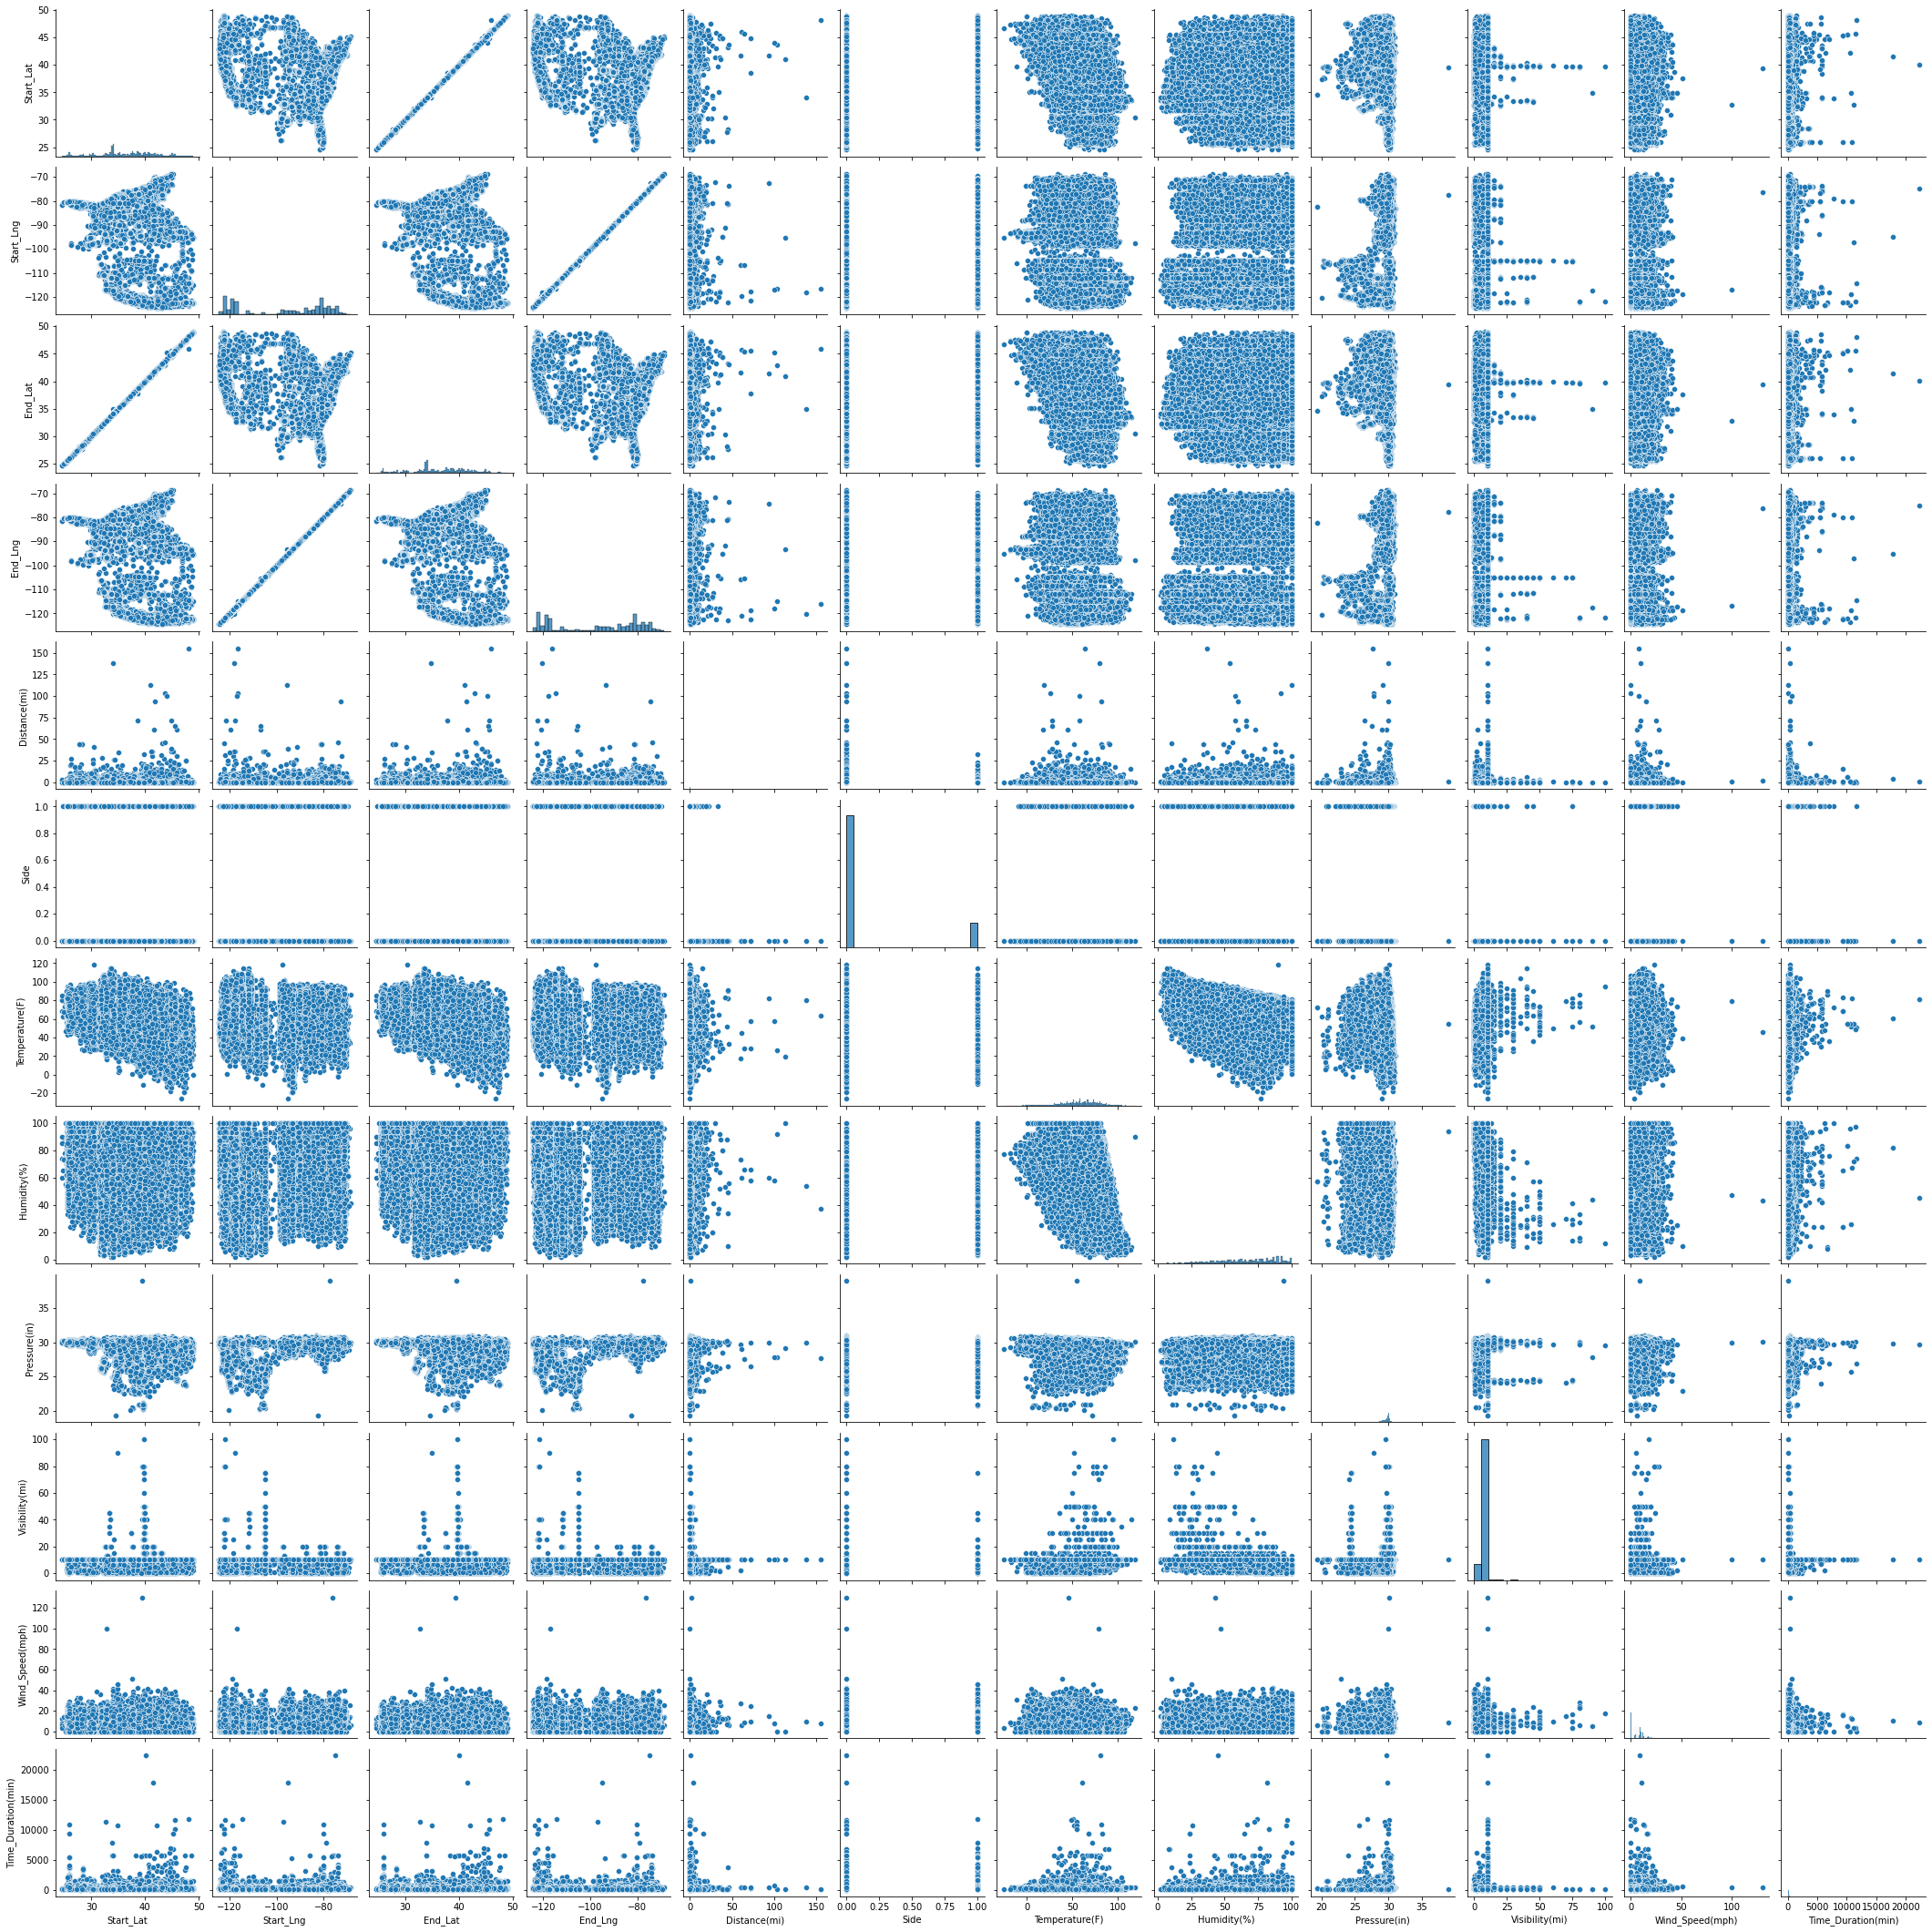

In [ ]:
sns.pairplot(Z)

In [ ]:
X = df[[ 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Time_Duration(min)', 'Wind_Direction_E', 'Wind_Direction_N',
       'Wind_Direction_NE', 'Wind_Direction_NW', 'Wind_Direction_S',
       'Wind_Direction_SE', 'Wind_Direction_SW', 'Wind_Direction_Variable',
       'Wind_Direction_W', 'Timezone_US/Eastern', 'Timezone_US/Mountain',
       'Timezone_US/Pacific', 'Weather_Condition_Cloudy',
       'Weather_Condition_Fog', 'Weather_Condition_Hail',
       'Weather_Condition_Rain', 'Weather_Condition_Sand',
       'Weather_Condition_Smoke', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Weather_Condition_Windy', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY']]
Y = df['Severity']

In [ ]:
X.shape

(88724, 97)

In [ ]:
## Correlation Matrix of all values
corr = X.corr()
print(corr)

                                Start_Lat  Start_Lng   End_Lat   End_Lng  \
Start_Lat                        1.000000  -0.066011  0.999994 -0.066012   
Start_Lng                       -0.066011   1.000000 -0.066014  0.999999   
End_Lat                          0.999994  -0.066014  1.000000 -0.066017   
End_Lng                         -0.066012   0.999999 -0.066017  1.000000   
Distance(mi)                     0.042674   0.073363  0.042154  0.073325   
Side                            -0.026520   0.059795 -0.026519  0.059794   
Temperature(F)                  -0.483785   0.003229 -0.483782  0.003230   
Humidity(%)                      0.031646   0.181639  0.031652  0.181644   
Pressure(in)                    -0.189723   0.183405 -0.189724  0.183403   
Visibility(mi)                  -0.085271   0.011892 -0.085271  0.011898   
Wind_Speed(mph)                  0.035340   0.152611  0.035342  0.152599   
Amenity                         -0.014276  -0.019754 -0.014278 -0.019754   
Bump        

In [ ]:
corr

Start_Lat  Start_Lng   End_Lat   End_Lng  \
Start_Lat                        1.000000  -0.066011  0.999994 -0.066012   
Start_Lng                       -0.066011   1.000000 -0.066014  0.999999   
End_Lat                          0.999994  -0.066014  1.000000 -0.066017   
End_Lng                         -0.066012   0.999999 -0.066017  1.000000   
Distance(mi)                     0.042674   0.073363  0.042154  0.073325   
Side                            -0.026520   0.059795 -0.026519  0.059794   
Temperature(F)                  -0.483785   0.003229 -0.483782  0.003230   
Humidity(%)                      0.031646   0.181639  0.031652  0.181644   
Pressure(in)                    -0.189723   0.183405 -0.189724  0.183403   
Visibility(mi)                  -0.085271   0.011892 -0.085271  0.011898   
Wind_Speed(mph)                  0.035340   0.152611  0.035342  0.152599   
Amenity                         -0.014276  -0.019754 -0.014278 -0.019754   
Bump                            -0.003470   0.011580 -0.003469  0.011579   
Crossing                         0.055878  -0.027576  0.055882 -0.027573   
Give_Way                        -0.007941  -0.027620 -0.007928 -0.027618   
Junction                        -0.021960   0.021379 -0.021959  0.021375   
No_Exit                          0.013434  -0.005498  0.013433 -0.005496   
Railway                         -0.003602   0.023756 -0.003605  0.023753   
Roundabout                       0.011635  -0.005181  0.011634 -0.005181   
Station                          0.057489  -0.018631  0.057486 -0.018631   
Stop                            -0.018288   0.048698 -0.018300  0.048705   
Traffic_Calming                 -0.000846   0.004100 -0.000843  0.004100   
Traffic_Signal                   0.069809  -0.100088  0.069808 -0.100085   
Sunrise_Sunset                   0.003866   0.017475  0.003851  0.017471   
Civil_Twilight                   0.015273   0.012681  0.015250  0.012680   
Nautical_Twilight                0.023551   0.002502  0.023520  0.002502   
Astronomical_Twilight            0.027162  -0.001509  0.027137 -0.001508   
Time_Duration(min)              -0.036447   0.048454 -0.036436  0.048447   
Wind_Direction_E                -0.103420   0.039171 -0.103419  0.039169   
Wind_Direction_N                -0.003610   0.040620 -0.003583  0.040613   
Wind_Direction_NE               -0.100427   0.113822 -0.100457  0.113817   
Wind_Direction_NW                0.093941   0.012778  0.093931  0.012774   
Wind_Direction_S                 0.036286   0.024656  0.036297  0.024654   
Wind_Direction_SE               -0.042499   0.005537 -0.042490  0.005540   
Wind_Direction_SW                0.054378  -0.009938  0.054386 -0.009933   
Wind_Direction_Variable         -0.001494  -0.035735 -0.001491 -0.035732   
Wind_Direction_W                 0.048883  -0.037747  0.048877 -0.037750   
Timezone_US/Eastern             -0.128102   0.836045 -0.128103  0.836045   
Timezone_US/Mountain             0.035063  -0.168630  0.035068 -0.168620   
Timezone_US/Pacific              0.050143  -0.886605  0.050143 -0.886609   
Weather_Condition_Cloudy         0.017835   0.139601  0.017811  0.139608   
Weather_Condition_Fog            0.014982  -0.066694  0.014983 -0.066686   
Weather_Condition_Hail           0.004218   0.000612  0.004217  0.000612   
Weather_Condition_Rain           0.034166   0.028953  0.034157  0.028953   
Weather_Condition_Sand          -0.004917  -0.008641 -0.004922 -0.008640   
Weather_Condition_Smoke          0.004569  -0.051496  0.004577 -0.051497   
Weather_Condition_Snow           0.163590   0.041181  0.163610  0.041168   
Weather_Condition_Thunderstorm  -0.039864   0.040534 -0.039853  0.040527   
Weather_Condition_Windy          0.023657   0.024625  0.023676  0.024618   
State_AR                        -0.017506   0.015454 -0.017482  0.015443   
State_AZ                        -0.097746  -0.117533 -0.097753 -0.117533   
State_CA                        -0.112543  -0.784322 -0.112536 -0.784328   
Stat

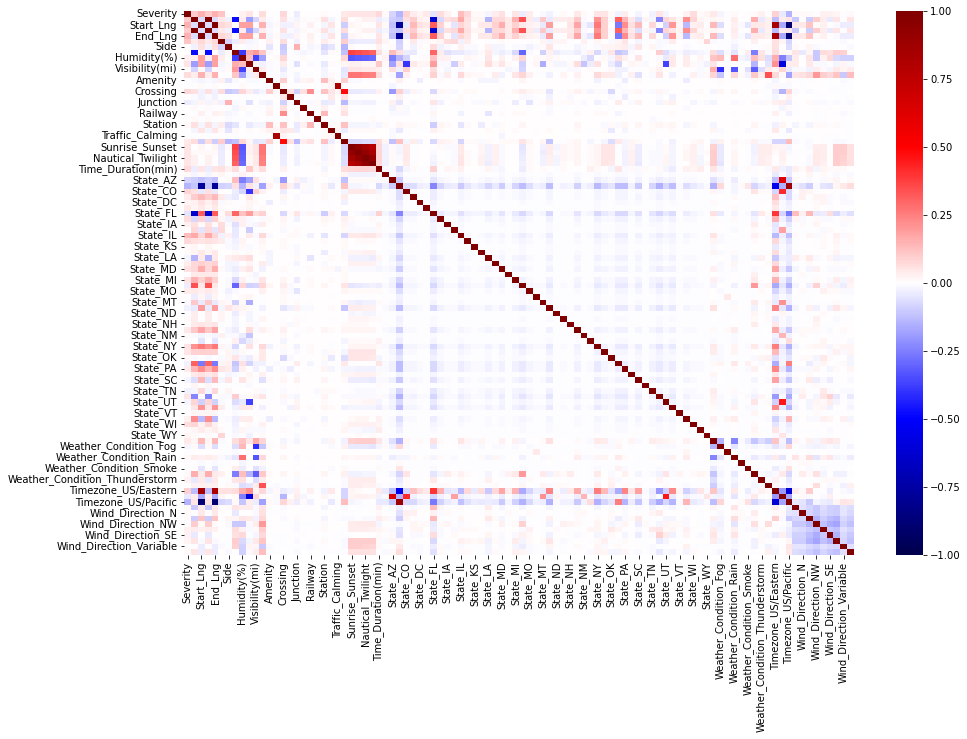

In [ ]:
#plotting the heatmap and correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

In [ ]:
X_c=sm.add_constant(X)

model=sm.OLS(Y,X_c)
results=model.fit()
results.summary()


C:\Users\aaadh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:32:31   Log-Likelihood:                -65609.
No. Observations:               88724   AIC:                         1.314e+05
Df Residuals:                   88626   BIC:                         1.323e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.5950      0.290      5.503      0.000       1.027       2.163
Start_Lat                         -0.4837      0.100     -4.837      0.000      -0.680      -0.288
Start_Lng                         -0.3503      0.069     -5.093      0.000      -0.485      -0.216
End_Lat                            0.4877      0.100      4.878      0.000       0.292       0.684
End_Lng                            0.3600      0.069      5.235      0.000       0.225       0.495
Distance(mi)                       0.0303      0.001     29.383      0.000       0.028       0.032
Side                               0.0406      0.005      8.370      0.000       0.031       0.050
Temperature(F)                     0.0015      0.000     10.926      0.000       0.001       0.002
Humidity(%)                        0.0007      0.000      6.090      0.000       0.000       0.001
Pressure(in)                       0.0338      0.002     14.143      0.000       0.029       0.038
Visibility(mi)                    -0.0014      0.001     -1.642      0.101      -0.003       0.000
Wind_Speed(mph)                    0.0004      0.000      0.761      0.447      -0.001       0.001
Amenity                           -0.0078      0.018     -0.438      0.661      -0.043       0.027
Bump                               0.1361      0.192      0.708      0.479      -0.241       0.513
Crossing                           0.0956      0.008     11.842      0.000       0.080       0.111
Give_Way                          -0.0009      0.034     -0.025      0.980      -0.068       0.066
Junction                          -0.0179      0.005     -3.333      0.001      -0.028      -0.007
No_Exit                            0.0196      0.048      0.407      0.684      -0.075       0.114
Railway                           -0.0587      0.019     -3.085      0.002      -0.096      -0.021
Roundabout                         0.1178      0.227      0.519      0.604      -0.327       0.563
Station                            0.0071      0.012      0.578      0.563      -0.017       0.031
Stop                              -0.0109      0.015     -0.722      0.470      -0.041       0.019
Traffic_Calming                   -0.2639      0.161     -1.644      0.100      -0.579       0.051
Traffic_Signal                     0.0411      0.006      6.934      0.000       0.029       0.053
Sunrise_Sunset                     0.0086      0.009      0.909      0.363      -0.010       0.027
Civil_Twilight                    -0.0091      0.012     -0.730      0.465      -0.033       0.015
Nautical_Twilight               8.445e-05      0.012      0.007      0.995      -0.024       0.024
Astronomical_Twilight              0.0219      0.010      2.294      0.022       0.003       0.041
Time_Duration(

In [ ]:
import timeit
results.pvalues
for predictor in X:
    p = getattr(results.pvalues, predictor)
    print("{}: p value = {:.3f}".format(predictor, p))
    if p < 0.05:
        print("Reject null hypothesis and the predictor is Statistically significant")
    else:
        print("Failed to reject the Null Hypothesis and the predictor is not Statistically Significant")
    print("--------------------------------------------------------------------------------------------------------------")

Start_Lat: p value = 0.000
Reject null hypothesis and the predictor is Statistically significant
--------------------------------------------------------------------------------------------------------------
Start_Lng: p value = 0.000
Reject null hypothesis and the predictor is Statistically significant
--------------------------------------------------------------------------------------------------------------
End_Lat: p value = 0.000
Reject null hypothesis and the predictor is Statistically significant
--------------------------------------------------------------------------------------------------------------
End_Lng: p value = 0.000
Reject null hypothesis and the predictor is Statistically significant
--------------------------------------------------------------------------------------------------------------
Distance(mi): p value = 0.000
Reject null hypothesis and the predictor is Statistically significant
------------------------------------------------------------------------

# Modeling techniques:

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%%time

#fit logistic regression before scaling 

from sklearn.linear_model import LogisticRegression

#split tha data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y)

#apply logistic regression
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)
print('The training prediction accuracy for Logistic Regression is '+ str(clf.score(X_train,y_train)))

print('The testing prediction accuracy for Logistic Regression is '+ str(clf.score(X_test,y_test)))

The training prediction accuracy for Logistic Regression is 0.8314924184361991
The testing prediction accuracy for Logistic Regression is 0.8376989315179658
Wall time: 2.8 s


C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,Y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#scaling the data is an importent key for this dataset since it contian values with high range for example some
#values might be as low as 0.1*10^-20 while other value might be 0.9

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='ovr',max_iter=1000,fit_intercept=False)
clf.fit(X_train_scaled, y_train)
print('The trianing prediction accuracy for Logistic Regression is '+ str(clf.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Logistic Regression is '+ str(clf.score(X_test_scaled,y_test)))

The trianing prediction accuracy for Logistic Regression is 0.8402386426821754
The testing prediction accuracy for Logistic Regression is 0.8385555204905099
Wall time: 5.96 s


In [ ]:
%%time

#Evaluate the performance of the models using appropriate metrics and interpret the
#results of each model

#the type of matrics to use is confusion matrix

from sklearn import metrics

y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)
#print the confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_test))

#print the precision and recall, among other metrics
print(metrics.classification_report(y_test,y_pred_test, digits=2))

[[  177   492    13     0]
 [   37 18177   189    26]
 [    4  1684   270     9]
 [    9  1021    32    41]]
              precision    recall  f1-score   support

         1.0       0.78      0.26      0.39       682
         2.0       0.85      0.99      0.91     18429
         3.0       0.54      0.14      0.22      1967
         4.0       0.54      0.04      0.07      1103

    accuracy                           0.84     22181
   macro avg       0.68      0.36      0.40     22181
weighted avg       0.80      0.84      0.79     22181

Wall time: 63.7 ms


In [ ]:
%%time

#Compare the performance of fitted models (i.e. training error versus testing error).


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
clf = LogisticRegression(multi_class='ovr',solver='newton-cg',penalty='none',max_iter=1000,fit_intercept=False,class_weight=None)

clf.fit(X_train_scaled, y_train)
print('The trianing prediction accuracy for Logistic Regression is '+ str(clf.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Logistic Regression is '+ str(clf.score(X_test_scaled,y_test)))


#######################################
mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
mean_sq_err_val_test = mean_squared_error(y_test,y_pred_test)
print('train mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)


The trianing prediction accuracy for Logistic Regression is 0.8430338277504771
The testing prediction accuracy for Logistic Regression is 0.8415310400793472
train mean squared error= 0.307169799978961
test mean squared error= 0.3091384518281412
Wall time: 1min 7s


In [ ]:
%%time


#a bias-variance trade-off for hyperparameter optimization of logistic regression

slvr=['newton-cg', 'lbfgs', 'sag', 'saga']
mean_sq_err_val_train_lst=[]
mean_sq_err_val_test_lst=[]

for i in slvr:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import accuracy_score

    clf = LogisticRegression(multi_class='ovr',solver=i,max_iter=1000,)


    clf.fit(X_train_scaled, y_train)


    from sklearn.metrics import mean_squared_error
    
    mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
    mean_sq_err_val_train_lst.append(mean_sq_err_val_train)

    mean_sq_err_val_test = mean_squared_error(y_test,y_pred_test)
    mean_sq_err_val_test_lst.append(mean_sq_err_val_test)
    print('train mean squared error for '+str(i)+'=',mean_sq_err_val_train)
    print('test mean squared error for '+str(i)+'=',mean_sq_err_val_test)
    
print('\nThe accuracy score for logistic regression model is '+ str(accuracy_score(y_test, y_pred_test)))



train mean squared error for newton-cg= 0.3041191410065672
test mean squared error for newton-cg= 0.30566701230783105
train mean squared error for lbfgs= 0.3041191410065672
test mean squared error for lbfgs= 0.30566701230783105
train mean squared error for sag= 0.3041191410065672
test mean squared error for sag= 0.30566701230783105
train mean squared error for saga= 0.3041191410065672
test mean squared error for saga= 0.30566701230783105

The accuracy score for logistic regression model is 0.8414859564492133
Wall time: 1min 32s


train mean squared error for saga= 0.3041191410065672
test mean squared error for saga= 0.30566701230783105
train mean squared error for saga= 0.3041191410065672
test mean squared error for saga= 0.30566701230783105

The accuracy score for logistic regression model is 0.8414859564492133


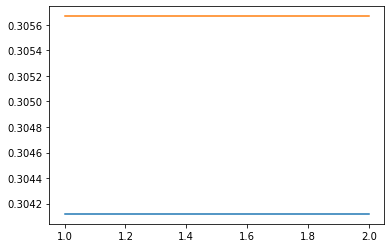

Wall time: 1min 31s


In [ ]:
%%time

#a bias-variance trade-off for hyperparameter optimization of logistic regression
penlty=['l2','none']
mean_sq_err_val_test_lst=[]
mean_sq_err_val_train_lst=[]

for j in penlty:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_squared_error
    clf = LogisticRegression(multi_class='ovr',solver='newton-cg',penalty=j,max_iter=1000,)


    clf.fit(X_train_scaled, y_train)


    from sklearn.metrics import mean_squared_error
    
    mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
    mean_sq_err_val_train_lst.append(mean_sq_err_val_train)

    mean_sq_err_val_test = mean_squared_error(y_test,y_pred_test)
    mean_sq_err_val_test_lst.append(mean_sq_err_val_test)
    print('train mean squared error for '+str(i)+'=',mean_sq_err_val_train)
    print('test mean squared error for '+str(i)+'=',mean_sq_err_val_test)
    
print('\nThe accuracy score for logistic regression model is '+ str(accuracy_score(y_test, y_pred_test)))
plt.figure()

plt.plot([1,2],mean_sq_err_val_train_lst)
plt.plot([1,2],mean_sq_err_val_test_lst)


plt.show()

# LDA

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis( solver='svd', shrinkage=None, priors=None, store_covariance=False)
lda.fit(X_train_scaled, y_train)


print('\nThe trianing prediction accuracy for LDA is  '+ str(lda.score(X_train_scaled,y_train)))

print('The testing prediction accuracy for LDA is '+ str(lda.score(X_test_scaled,y_test)))



The trianing prediction accuracy for LDA is  0.825466239874968
The testing prediction accuracy for LDA is 0.8235877552860557


In [ ]:
#Evaluate the performance of the models using appropriate metrics and interpret the
#results of each model


# since our data set is a balance data (ratio between labels are similer )
#the type of matrics to use is accuracy matrix

from sklearn import metrics

y_pred = lda.predict(X_test_scaled)
#print the confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

#print the precision and recall, among other metrics
print(metrics.classification_report(y_test,y_pred, digits=3))


[[  204   457    20     1]
 [  343 17473   407   206]
 [   21  1428   456    62]
 [   31   876    61   135]]
              precision    recall  f1-score   support

         1.0      0.341     0.299     0.319       682
         2.0      0.864     0.948     0.904     18429
         3.0      0.483     0.232     0.313      1967
         4.0      0.334     0.122     0.179      1103

    accuracy                          0.824     22181
   macro avg      0.505     0.400     0.429     22181
weighted avg      0.787     0.824     0.797     22181



In [ ]:
%%time
# Perform a bias-variance trade-off for hyperparameter optimization of your models.

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.825
Config: {'solver': 'svd'}


In [ ]:
%%time

#Next, we can explore whether using shrinkage with the model improves performance.

#Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model.
import numpy as np
import matplotlib
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

print('\nIn this case, we can see that using shrinkage offers no improvement on the accuracy, with a value of 0.0')

Mean Accuracy: 0.829
Config: {'shrinkage': 0.11}

In this case, we can see that using shrinkage offers no improvement on the accuracy, with a value of 0.0
Wall time: 5min 6s


In [ ]:
%%time

from sklearn.metrics import mean_squared_error
lda = LinearDiscriminantAnalysis( solver='svd', shrinkage=None, priors=None, store_covariance=False)
lda.fit(X_train_scaled, y_train)


from sklearn.metrics import mean_squared_error


y_pred_test = lda.predict(X_test_scaled)
y_pred_train = lda.predict(X_train_scaled)
#######################################
mean_sq_err_val_train = mean_squared_error(y_train, y_pred_train)
mean_sq_err_val_train_lst.append(mean_sq_err_val_train)
    
mean_sq_err_val_test = mean_squared_error(y_test, y_pred_test)
mean_sq_err_val_test_lst.append(mean_sq_err_val_test)
print('train mean squared error for LDA''=',mean_sq_err_val_train)
print('test mean squared error for LDA'+'=',mean_sq_err_val_test)
    
print('\nThe accuracy score for LDA model is '+ str(accuracy_score(y_test, y_pred_test)))

train mean squared error for LDA= 0.33681980073035483
test mean squared error for LDA= 0.339840403949326

The accuracy score for LDA model is 0.8235877552860557
Wall time: 585 ms


# KNN

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

knnreg = KNeighborsClassifier(n_neighbors = 10, weights='uniform', p=2, metric='minkowski')
knnreg.fit(X_train_scaled, y_train)
print('The training prediction accuracy for KNN is '+ str(knnreg.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for KNN is '+ str(knnreg.score(X_test_scaled,y_test)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = knnreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for KNN model is '+ str(accuracy_score(y_test, y_pred_test)))

##########################
ypred_test= knnreg.predict(X_test_scaled)
ypred_train= knnreg.predict(X_train_scaled)

#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train, ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

The training prediction accuracy for KNN is 0.850908435147198
The testing prediction accuracy for KNN is 0.8377440151480997
[[  182   484    14     2]
 [   72 18100   224    33]
 [    6  1673   277    11]
 [   13  1027    40    23]]

The accuracy score for KNN model is 0.8235877552860557
              precision    recall  f1-score   support

         1.0      0.667     0.267     0.381       682
         2.0      0.850     0.982     0.912     18429
         3.0      0.499     0.141     0.220      1967
         4.0      0.333     0.021     0.039      1103

    accuracy                          0.838     22181
   macro avg      0.587     0.353     0.388     22181
weighted avg      0.788     0.838     0.791     22181


train mean squared error= 0.2951024149797875
test mean squared error= 0.31373698210179884
Wall time: 2min 50s


In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

hyperparam={'n_neighbors': list(range(1,35,5))}#, 'weight':('uniform','distance')
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparam, cv=500)

#Fit the model
best_model = clf.fit(X_train_scaled,y_train)


#Print The value of best Hyperparameters

print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 31
Wall time: 19min 8s


[0.7898351149678754, 0.8349639484065554, 0.8399832055059383, 0.8420720458277188, 0.8423726259457206, 0.8424778009849068, 0.8427182488200158, 0.8428985734051722, 0.8425529279485267, 0.8427933780418708]
Wall time: 9min 45s


Text(0, 0.5, 'Cross-Validated Accuracy')

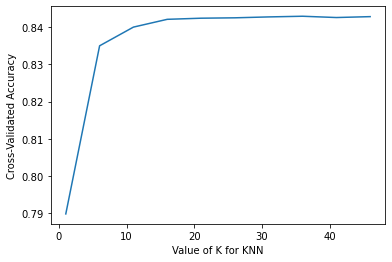

In [ ]:
%%time


from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN

# list of integers 1 to 100
# integers we want to try
k_range = range(1, 50,5)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train_scaled,y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

 # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
%%time


# KNN model with the best n_neighbors = 31
knnreg = KNeighborsClassifier(n_neighbors = 31, weights='uniform', p=2, metric='minkowski')
knnreg.fit(X_train_scaled, y_train)
print('The training prediction accuracy for KNN is '+ str(knnreg.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for KNN is '+ str(knnreg.score(X_test_scaled,y_test)))

y_pred = knnreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for KNN model is '+ str(accuracy_score(y_test, y_pred_test)))


ypred_test= knnreg.predict(X_test_scaled)
ypred_train= knnreg.predict(X_train_scaled)

#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train, ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

The training prediction accuracy for KNN is 0.8450475632297912
The testing prediction accuracy for KNN is 0.8408097019972048
[[  153   521     8     0]
 [   31 18255   141     2]
 [    2  1722   242     1]
 [   11  1064    28     0]]

The accuracy score for KNN model is 0.8235877552860557
              precision    recall  f1-score   support

         1.0      0.777     0.224     0.348       682
         2.0      0.847     0.991     0.913     18429
         3.0      0.578     0.123     0.203      1967
         4.0      0.000     0.000     0.000      1103

    accuracy                          0.841     22181
   macro avg      0.550     0.334     0.366     22181
weighted avg      0.779     0.841     0.787     22181


train mean squared error= 0.3031273011436214
test mean squared error= 0.30868761552680224
Wall time: 2min 59s


# Decision Tree

In [ ]:
### Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                           max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
dt.fit(X_train_scaled, y_train)
print('The training prediction accuracy for Decision Tree is '+ str(dt.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Decision Tree is '+ str(dt.score(X_test_scaled,y_test)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Decision Tree model is '+ str(accuracy_score(y_test, y_pred)))

##########################
ypred_test= dt.predict(X_test_scaled)
ypred_train= dt.predict(X_train_scaled)


#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

The training prediction accuracy for Decision Tree is 0.9996543588356401
The testing prediction accuracy for Decision Tree is 0.8328749830936387
[[  417   191    58    16]
 [  176 16770   929   554]
 [   75   831   898   163]
 [   24   524   166   389]]

The accuracy score for Decision Tree model is 0.8328749830936387
              precision    recall  f1-score   support

         1.0      0.603     0.611     0.607       682
         2.0      0.916     0.910     0.913     18429
         3.0      0.438     0.457     0.447      1967
         4.0      0.347     0.353     0.350      1103

    accuracy                          0.833     22181
   macro avg      0.576     0.583     0.579     22181
weighted avg      0.835     0.833     0.834     22181


train mean squared error= 0.001337481027305652
test mean squared error= 0.3453406068256616


In [ ]:
#Optimization of Hyperparameters

from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['int', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]

# Create the random grid
random_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

dt_search = RandomizedSearchCV(dt, random_grid, n_iter=50, cv=10)
dt_search.fit(X_train_scaled, y_train)
bh = dt_search.best_params_
bs = dt_search.best_score_
print(bh)
print(bs)

{'criterion': ['gini', 'entropy'], 'max_features': ['int', 'auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

{'min_samples_split': 36, 'min_samples_leaf': 14, 'max_features': 'auto', 'max_depth': 78, 'criterion': 'gini'}
0.8522309984763687


C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

In [ ]:
%%time

# Decision Tree with the best parameters
dt = dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=78,
                           min_samples_split= 36, min_samples_leaf=14,
                           max_features='auto')

dt.fit(X_train_scaled, y_train)

print('The training prediction accuracy for Decision Tree is '+ str(dt.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Decision Tree is '+ str(dt.score(X_test_scaled,y_test)))



y_pred = dt.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Decision Tree model is '+ str(accuracy_score(y_test, y_pred)))

##########################
ypred_test= dt.predict(X_test_scaled)


ypred_train= dt.predict(X_train_scaled)


#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

[[  292   357    32     1]
 [  213 17787   330    99]
 [   50  1287   595    35]
 [   28   899    96    80]]

The accuracy score for Decision Tree model is 0.8454983995311303
              precision    recall  f1-score   support

         1.0      0.501     0.428     0.462       682
         2.0      0.875     0.965     0.918     18429
         3.0      0.565     0.302     0.394      1967
         4.0      0.372     0.073     0.121      1103

    accuracy                          0.845     22181
   macro avg      0.578     0.442     0.474     22181
weighted avg      0.811     0.845     0.818     22181


train mean squared error= 0.2870174173091084
test mean squared error= 0.31103196429376495
Wall time: 190 ms


# Random Forest

In [ ]:
## Random Forest

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['int', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

rf_search = RandomizedSearchCV(rf, random_grid, n_iter=40, cv=10)
rf_search.fit(X_train_scaled, y_train)
bh = rf_search.best_params_
bs = rf_search.best_score_
print(bh)
print(bs)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['int', 'auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], '

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

{'n_estimators': 900, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 'auto', 'max_depth': 79, 'bootstrap': False}
0.8635619457585489


In [ ]:
%%time

## Random Forest with the best parameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 900, min_samples_split = 9, min_samples_leaf = 11, 
                             max_features = 'auto', max_depth = 79, bootstrap = False)

clf.fit(X_train_scaled, y_train)
print('The training prediction accuracy for Random Forest is '+ str(clf.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Random Forest is '+ str(clf.score(X_test_scaled,y_test)))

y_pred = clf.predict(X_test_scaled)

from sklearn import preprocessing
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Random Forest model is '+ str(accuracy_score(y_test, y_pred)))

##########################
ypred_test= clf.predict(X_test_scaled)

ypred_train= clf.predict(X_train_scaled)

#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

The training prediction accuracy for Random Forest is 0.8761702958988924
The testing prediction accuracy for Random Forest is 0.862449844461476
[[  321   342    19     0]
 [   45 18275   107     2]
 [   25  1445   496     1]
 [   11  1010    44    38]]

The accuracy score for Random Forest model is 0.862449844461476
              precision    recall  f1-score   support

         1.0      0.799     0.471     0.592       682
         2.0      0.867     0.992     0.925     18429
         3.0      0.745     0.252     0.377      1967
         4.0      0.927     0.034     0.066      1103

    accuracy                          0.862     22181
   macro avg      0.834     0.437     0.490     22181
weighted avg      0.857     0.862     0.824     22181


train mean squared error= 0.26400973806410893
test mean squared error= 0.2843424552544971
Wall time: 5min 48s


# Model Selection

In [ ]:
#Ridge Regression

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#generating random values for alpha using CV
alpha_list = np.linspace(100,0,50)

Ridgemodel = RidgeCV(alphas=alpha_list, normalize=False, cv=10)
Ridgemodel.fit(X_train_scaled, y_train)
best_alpha = Ridgemodel.alpha_
print('The best alpha value is {:.4f}'.format(Ridgemodel.alpha_))
#After cross validation the best Alpha value is given


best_coeffs = Ridgemodel.coef_

The best alpha value is 2.0408


In [ ]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha = best_alpha).fit(X_train_scaled, y_train)
Ridge2_train = linridge.score(X_train_scaled, y_train)
Ridge2_test = linridge.score(X_test_scaled, y_test)
mse_train = mean_squared_error(y_train, linridge.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, linridge.predict(X_test_scaled))

print('Alpha = {:.3f}, \nR-squared score (Training): {:.2f}, \nR-squared score (Testing): {:.2f}\n'
         .format(best_alpha,Ridge2_train,Ridge2_test))
print('MSE for training data: {:.3f}'.format(mse_train))
print('MSE for testing data: {:.3f}'.format(mse_test))

Alpha = 2.041, 
R-squared score (Training): 0.12, 
R-squared score (Testing): 0.12

MSE for training data: 0.257
MSE for testing data: 0.258


In [ ]:
#Lasso

from sklearn.linear_model import LassoCV

#generating random values for alpha using CV
alpha_list = np.linspace(100,0,50)
Lassomodel = LassoCV(alphas=alpha_list, fit_intercept=True,max_iter = 10000, cv=None)
Lassomodel.fit(X_train_scaled, y_train)
print('The best alpha value is {:.3f}'.format(Lassomodel.alpha_))

best_alpha = Lassomodel.alpha_
best_coeffs = Lassomodel.coef_

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6812.2179748759045, tolerance: 1.5489776627719174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6833.977120129788,

The best alpha value is 0.000


C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8543.329451726488, tolerance: 1.9379886509475122
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=best_alpha, max_iter = 10000).fit(X_train_scaled, y_train)
r2_train = linlasso.score(X_train_scaled, y_train)
r2_test = linlasso.score(X_test_scaled, y_test)
print('Alpha = {:.4f}\nFeatures kept: {}, \nR-squared score (training): {:.3f}, \nR-squared score (test): {:.3f}\n'
         .format(best_alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

mean_sq_err_val_train = mean_squared_error(y_train, linlasso.predict(X_train_scaled))
mean_sq_err_val_test = mean_squared_error(y_test, linlasso.predict(X_test_scaled))


print('Features with non-zero weight:')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('{}, {:.3f}'.format(e[0], e[1]))
        

print('\nMSE for training data: {:.3f}'.format(mean_sq_err_val_train))
print('MSE for testing data: {:.3f}'.format(mean_sq_err_val_test))

C:\Users\aaadh\AppData\Local\Temp/ipykernel_11260/4252906843.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  linlasso = Lasso(alpha=best_alpha, max_iter = 10000).fit(X_train_scaled, y_train)
C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.0000
Features kept: 97, 
R-squared score (training): 0.118, 
R-squared score (test): 0.119

Features with non-zero weight:
[ 3.23579731  2.73498705  3.67629079  2.10407891  2.04725035  2.02749499
  0.97521014 -2.53966799  1.06547384  2.18286231], 3.970
[-4.04848955  0.86015746 -0.09259507 -0.71322745 -0.92220407  3.49548521
  0.29405656  1.5262783  -0.14743872  1.07497795], 1.745
[ 1.24304323 -2.27418668 -0.34617529 -3.07486869 -1.46829132  0.29326083
 -2.97786915 -0.79586416 -3.84929236 -0.43768741], 1.142
[ 3.24647513 -0.59550199  0.53224488 -5.76158052 -2.2173965  -3.35826332
 -0.77843474 -5.28338656  2.15753003  0.05156021], 1.120
[-1.72160156 -2.32154245  1.46578391  0.64856362  0.48953395 -3.64247214
  1.43605947  0.97429449  2.58320993  0.93096172], 0.964
[ 0.12777556 -3.64400522 -2.23268854 -1.82114386  1.75466361  0.1243966
  1.03397657  2.35822076  1.01001752  0.56768485], -0.857
[ 0.85018026 -3.89905639 -3.80218146 -2.07705766  3.0046137  -2.54973034
 -2.80184657 -

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8543.10576875048, tolerance: 1.9379886509475122
  model = cd_fast.enet_coordinate_descent(


# PCA

In [ ]:
X_train_scaled.shape


(66543, 97)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
X_reduced = pca.fit_transform(X_train_scaled)
X_reduced_test = pca.transform(X_test_scaled)
print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:20]
print(pd.DataFrame(pca.components_,columns=pd.DataFrame(X_train_scaled).columns))
print(X_train_scaled.shape)
print(X_reduced.shape)

(30, 97)
          0         1         2         3         4         5         6   \
0  -0.001969 -0.044658 -0.001966 -0.044659  0.000596 -0.006855 -0.050083   
1   0.020101 -0.359128  0.020112 -0.359148 -0.001430 -0.037518  0.004211   
2   0.035209 -0.046074  0.035220 -0.046070 -0.000355 -0.030599 -0.001251   
3   0.361846 -0.009897  0.362032 -0.009897  0.001940 -0.074785 -0.120905   
4  -0.089305 -0.089260 -0.089348 -0.089262 -0.003860  0.469470  0.041189   
5  -0.008405  0.006481 -0.008417  0.006478 -0.001136  0.149668 -0.023385   
6   0.185615  0.040494  0.185715  0.040488 -0.001586  0.297402 -0.036364   
7  -0.186555 -0.027696 -0.186653 -0.027692  0.000646 -0.538200  0.080148   
8   0.135171  0.028810  0.135244  0.028809 -0.001025 -0.446489 -0.023365   
9   0.047949 -0.010833  0.047964 -0.010841  0.000287 -0.198532 -0.024623   
10 -0.012208  0.010517 -0.012210  0.010519 -0.001633  0.350511  0.020003   
11  0.070149 -0.014199  0.070171 -0.014201 -0.001191 -0.017616 -0.048509   
12 

In [ ]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(66543, 30)


0         1         2         3         4         5
0  1.463179  1.055682 -0.185837 -0.185733 -0.115987  0.009446
1 -0.772192 -0.759857 -0.466637  0.187935 -0.327689 -0.280386
2 -0.801719 -0.823255 -0.588355 -0.878301  0.263486 -0.293904
3 -0.754807 -0.200063  0.502029 -0.018535  0.572551 -0.070307
4 -0.680502 -0.106066 -0.526529  0.368934  0.070640 -0.550373

In [ ]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([19.82, 37.68, 43.28, 47.74, 51.79, 55.25, 58.68, 61.56, 64.19,
       66.77, 69.01, 71.15, 73.08, 74.76, 76.34, 77.8 , 79.19, 80.52,
       81.79, 82.95, 83.97, 84.95, 85.92, 86.82, 87.66, 88.5 , 89.21,
       89.85, 90.42, 90.96])

In [ ]:
pca.explained_variance_

array([0.85521289, 0.77052654, 0.24159229, 0.19257846, 0.17493319,
       0.1493758 , 0.14789886, 0.12439368, 0.11326775, 0.11153895,
       0.09650888, 0.09213307, 0.08334903, 0.0724455 , 0.0681247 ,
       0.06291214, 0.05998234, 0.05728235, 0.05462145, 0.05006033,
       0.04380015, 0.04224266, 0.04191743, 0.03863173, 0.03629119,
       0.03620432, 0.03081867, 0.02754637, 0.02441368, 0.0232805 ])

Wall time: 48min 45s


(-1.0, 19.95)

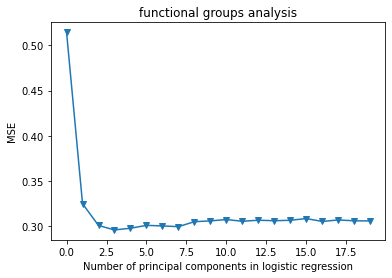

In [ ]:
%%time

#Random Forest
from sklearn.model_selection import KFold,cross_val_score

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = RandomForestClassifier()
mse = []
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded_train=le.fit_transform(y_train)
y_encoded_train

# Calculate MSE with only the intercept (no principal components in regression)
#score = -1*cross_val_score(regr, np.ones((n,1)), y_encoded_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
#mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 21):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y_encoded_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in logistic regression')
plt.ylabel('MSE')
plt.title('functional groups analysis')
plt.xlim(xmin=-1);

In [ ]:
%%time

## Random Forest

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['int', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

rf_search = RandomizedSearchCV(rf, random_grid, n_iter=40, cv=10)
rf_search.fit(X_reduced, y_encoded_train)
bh = rf_search.best_params_
bs = rf_search.best_score_
print(bh)
print(bs)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['int', 'auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], '

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\aaadh\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [f

C:\Users\aaadh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.84222234        nan 0.84183161 0.84207204 0.84147096        nan
        nan 0.84548341        nan 0.84177149 0.8434396  0.84196685
 0.84184664        nan 0.84193679 0.8417715  0.84301883        nan
 0.8416663  0.84186165 0.8421472         nan 0.84250787 0.84351474
        nan 0.84178651 0.84216219 0.84226742        nan 0.8417715
 0.8427333         nan 0.84181658        nan 0.84229748        nan
 0.84186166 0.84464182 0.84174144 0.84270323]
  warnings.warn(


{'n_estimators': 200, 'min_samples_split': 45, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 45, 'bootstrap': False}
0.8454834124731805
Wall time: 4h 4min 47s


In [ ]:
%%time

## Random Forest with the best parameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, min_samples_split = 45, min_samples_leaf = 1, 
                             max_features = 'auto', max_depth = 45, bootstrap = False)

clf.fit(X_reduced, y_train)
print('The training prediction accuracy for Random Forest is '+ str(clf.score(X_reduced,y_train)))
print('The testing prediction accuracy for Random Forest is '+ str(clf.score(X_reduced_test,y_test)))

y_pred = clf.predict(X_reduced_test)

from sklearn import preprocessing
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Random Forest model is '+ str(accuracy_score(y_test, y_pred)))

##########################
ypred_test= clf.predict(X_reduced_test)

ypred_train= clf.predict(X_reduced)

#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

The training prediction accuracy for Random Forest is 0.8888237680898066
The testing prediction accuracy for Random Forest is 0.842072043640954
[[  168   507     7     0]
 [   31 18191   198     9]
 [    2  1659   302     4]
 [    9  1053    24    17]]

The accuracy score for Random Forest model is 0.842072043640954
              precision    recall  f1-score   support

         1.0      0.800     0.246     0.377       682
         2.0      0.850     0.987     0.913     18429
         3.0      0.569     0.154     0.242      1967
         4.0      0.567     0.015     0.030      1103

    accuracy                          0.842     22181
   macro avg      0.696     0.351     0.390     22181
weighted avg      0.809     0.842     0.793     22181


train mean squared error= 0.23267661512104953
test mean squared error= 0.30602768134890224
Wall time: 1min 47s
